In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read API dataset
df_api = pd.read_csv("api_security_findings.csv")

In [4]:
# Clean column names
def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^\w\s]", "", regex=True)
    )
    return df

In [5]:
# Apply the cleaning function to the DataFrame
df_api = clean_column_names(df_api)

In [6]:
# Fill missing values and extract app version to a new column
def clean_api_data(df):
    df = df.copy()
    df['app_version'] = df['app_name'].str.extract(r'evil-corp-app-(\d+)')
    df = df.fillna("N/A")
    return df

In [7]:
# Apply the cleaning function to the DataFrame
df_api_clean = clean_api_data(df_api)

In [8]:
# Expected columns check
expected_api_cols = ['vulnerability_name', 'path', 'app_name']
missing_api_cols = [col for col in expected_api_cols if col not in df_api_clean.columns]
if missing_api_cols:
    raise KeyError(f"Missing expected columns in API dataset: {missing_api_cols}")

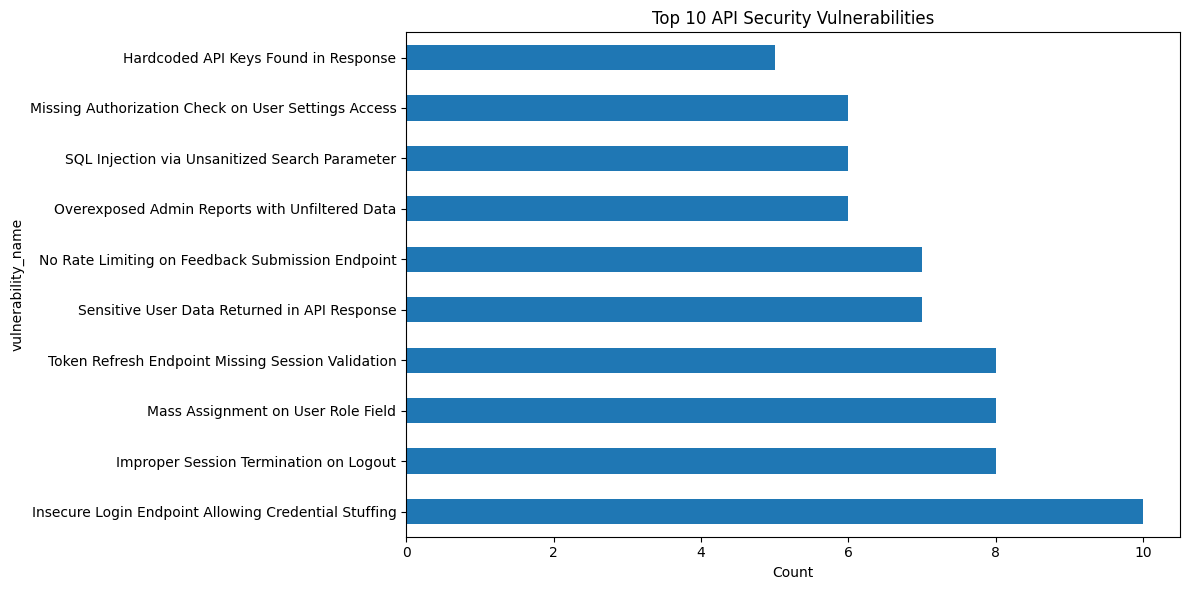

In [9]:
# Visualization - Top API vulnerabilities
plt.figure(figsize=(12, 6))
df_api_clean['vulnerability_name'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 API Security Vulnerabilities')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig('top_api_vulnerabilities.png')
plt.show()

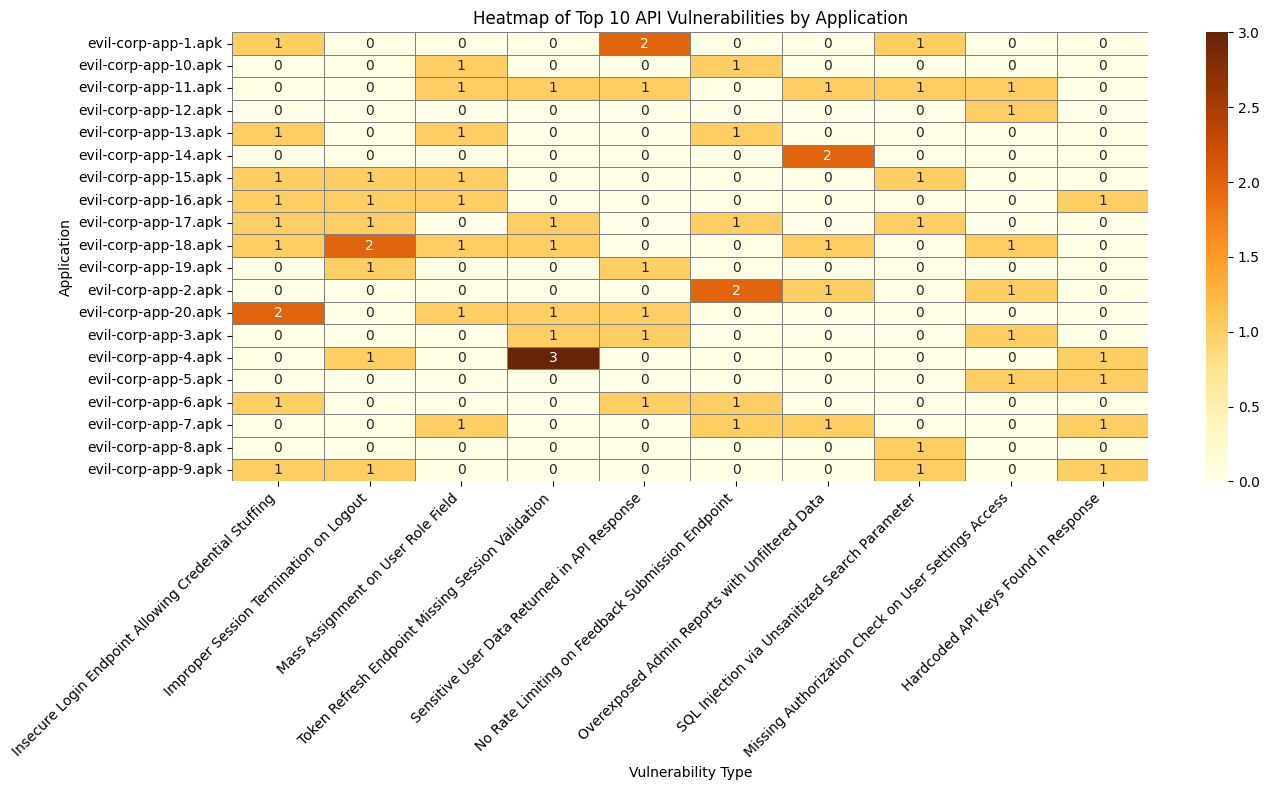

In [10]:
# Heatmap of vulnerability types across apps
heatmap_data = pd.crosstab(df_api_clean['app_name'], df_api_clean['vulnerability_name'])

# Optional: limit to top N vulnerabilities to keep heatmap readable
top_vulns = df_api_clean['vulnerability_name'].value_counts().head(10).index
heatmap_data = heatmap_data[top_vulns]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrBr", linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Top 10 API Vulnerabilities by Application")
plt.xlabel("Vulnerability Type")
plt.ylabel("Application")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("api_vulnerability_heatmap.png")
plt.show()

In [11]:
# Technical report
def generate_api_report():
    api_findings = {
        'total_vulnerabilities': len(df_api_clean),
        'unique_apps_affected': df_api_clean['app_name'].nunique(),
        'top_vulnerabilities': df_api_clean['vulnerability_name'].value_counts().head(5)
    }

    with open('api_technical_report.txt', 'w') as f:
        f.write("API Security Technical Report\n")
        f.write("===========================================================\n\n")
        f.write(f"- Total Vulnerabilities: {api_findings['total_vulnerabilities']}\n")
        f.write(f"- Unique Apps Affected: {api_findings['unique_apps_affected']}\n")
        f.write("- Top Vulnerabilities:\n")
        f.write(api_findings['top_vulnerabilities'].to_string())
        f.write("\n")

In [10]:
generate_api_report()
print("API report generated: api_technical_report.txt.")

API report generated: api_technical_report.txt.


In [11]:
# Export cleaned dataset
df_api_clean.to_excel('cleaned_api_findings.xlsx', index=False)
print("API data exported to Excel.")

API data exported to Excel.
